# Klasyfikacja 

# Autorzy
Adam Dohojda, Kacper Kiereś, Dawid Koceniak, Wiktoria Stęczna

# PCA

Import bibliotek

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from plot_decision_region import plot_decision_regions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wczytywanie danych

In [194]:
data = pd.read_excel("hour.xlsx")
y = data['season']
X = data.drop(columns = ['instant', 'dteday', 'season'])

In [195]:
print('Class labels: ', np.unique(y))

Class labels:  [1 2 3 4]


Dzielenie próby na próbę treningową i próbę testową.

In [196]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, 
                     stratify = y,
                     random_state = 0)

In [197]:
print('Labels counts in y: ', np.bincount(y)[1:])
print('Labels counts in y_train: ', np.bincount(y_train)[1:])
print('Labels counts in y_test: ', np.bincount(y_test)[1:])

Labels counts in y:  [4242 4409 4496 4232]
Labels counts in y_train:  [2969 3086 3147 2963]
Labels counts in y_test:  [1273 1323 1349 1269]


Standaryzacja zmiennych

In [198]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Macierz kowariancji

In [199]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [3.6403e+00 1.7572e+00 1.3810e+00 1.2175e+00 2.8687e-01 4.4404e-01
 6.4368e-01 1.0679e+00 1.0030e+00 9.4803e-01 8.2126e-01 7.7829e-01
 1.2184e-02 6.7194e-16]


Całkowita i wyjaśniona wariancja

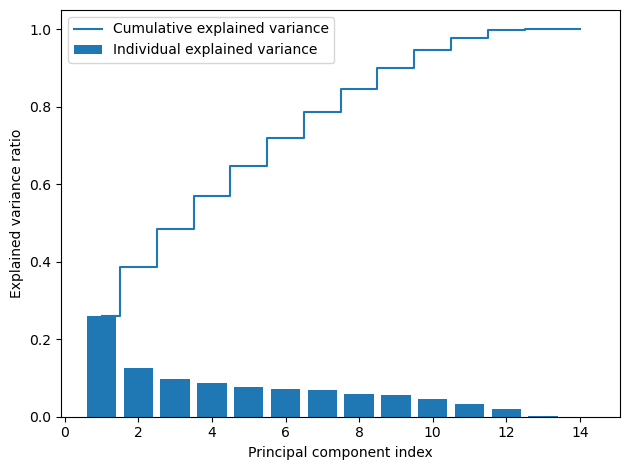

In [200]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
           sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 15), var_exp, align = 'center', 
        label = 'Individual explained variance')
plt.step(range(1 , 15), cum_var_exp, where = 'mid',
         label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Transformacja zmiennych

In [201]:
# Tworzenie listy krotek (eigenvalue, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) 
               for i in range(len(eigen_vals))]

# Sortowanie malejące 
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Macierz W: ', w)

Macierz W:  [[-0.1307  0.0699]
 [-0.095  -0.3623]
 [-0.2455  0.2246]
 [ 0.0124  0.0666]
 [-0.0164  0.0179]
 [ 0.0063 -0.1255]
 [ 0.1381 -0.2052]
 [-0.3671 -0.4205]
 [-0.3643 -0.4354]
 [ 0.2274 -0.4742]
 [-0.0596  0.363 ]
 [-0.4112  0.0746]
 [-0.4276  0.1037]
 [-0.4684  0.1068]]


In [202]:
print(X_train_std[0].dot(w))

[ 3.6014 -0.4858]


In [203]:
X_train_pca = X_train_std.dot(w)

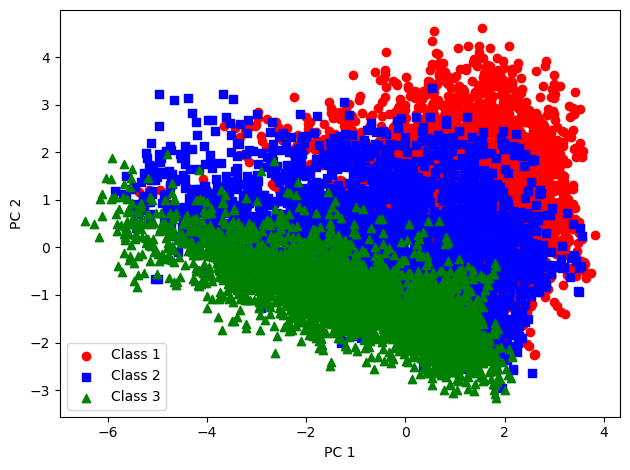

In [204]:
colors = ['r', 'b' , 'g']
markers = ['o', 's' ,'^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c = c, label = f'Class {l}', marker = m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

Inicjalizacja transformatora PCA i estymatora regresji logistycznej

In [205]:
pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'ovr',
                        random_state = 1,
                        solver = 'lbfgs')

Redukcja wymiarów

In [206]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Dopasowywanie modelu regresji logistycznej do zredukowanego zbioru danych

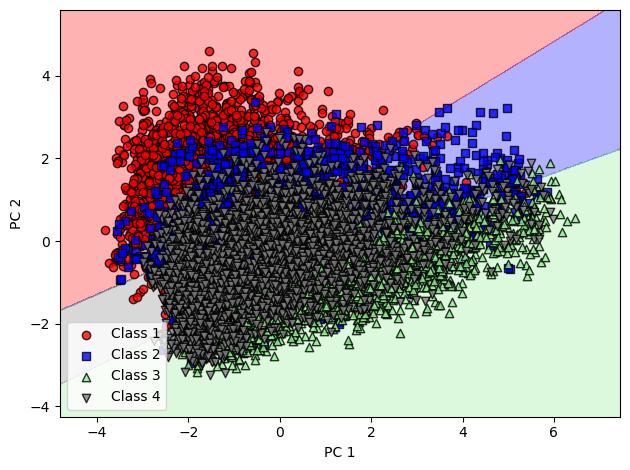

In [207]:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()



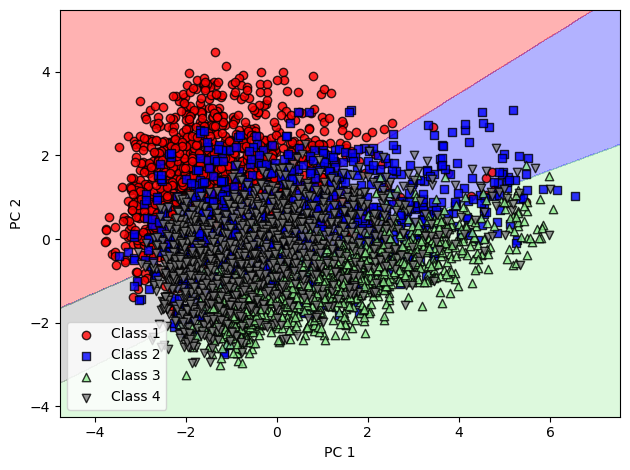

In [208]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()



In [209]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)


[2.6000e-01 1.2550e-01 9.8636e-02 8.6954e-02 7.6270e-02 7.1636e-02
 6.7711e-02 5.8656e-02 5.5588e-02 4.5973e-02 3.1715e-02 2.0489e-02
 8.7020e-04 2.5824e-33]


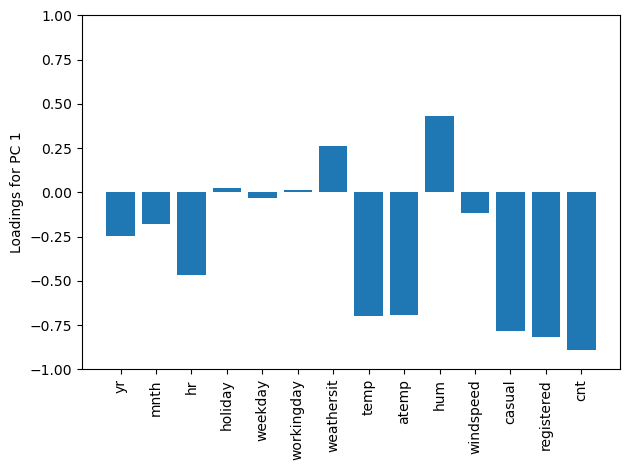

In [210]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
fig, ax = plt.subplots()
ax.bar(range(14), loadings[:, 0], align = 'center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(14))
ax.set_xticklabels(X.columns, rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


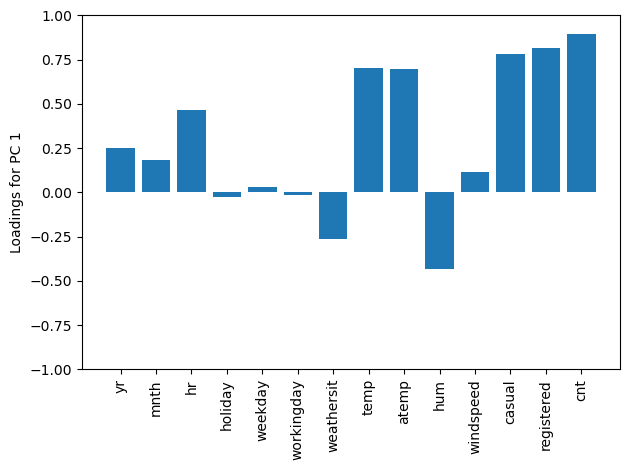

In [211]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(14), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(14))
ax.set_xticklabels(X.columns, rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# LDA

Obliczanie macierzy rozproszenia

In [212]:
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(
        X_train_std[y_train == label], axis = 0))
    print(f'MV {label}: {mean_vecs[label - 1]} \n')

d = 14
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')
print('Class label distribution: ', np.bincount(y_train)[1:])

d = 14 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')
    
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 14 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    S_B += n * (mean_vec - mean_overall).dot(
        (mean_vec - mean_overall).T)
print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

MV 1: [ 3.1733e-03 -1.0014e+00  2.8900e-03  4.9523e-02  1.4544e-04 -4.1859e-02
  5.8488e-02 -1.0234e+00 -1.0304e+00 -2.3488e-01  2.1298e-01 -4.4020e-01
 -3.8021e-01 -4.3668e-01] 

MV 2: [-2.1572e-04 -5.4554e-01  1.6857e-03 -3.6420e-02 -1.2392e-02  1.6787e-02
  1.6338e-02  2.5015e-01  2.6354e-01 -2.2660e-03  1.0228e-01  2.1534e-01
  5.2649e-02  1.0220e-01] 

MV 3: [ 0.0076  0.3394 -0.0065 -0.0448  0.0101  0.0398 -0.146   1.0819  1.0413
  0.0302 -0.146   0.2939  0.2051  0.2508] 

Within-class scatter matrix: 14x14
Class label distribution:  [2969 3086 3147 2963]
Scaled within-class scatter matrix: 14x14
Between-class scatter matrix: 14x14


Wybór dyskryminantów liniowych dla nowej podprzestrzeni cech

In [213]:
eigen_vals, eigen_vecs = np.linalg.eig(
    np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
print('Eigenvalues in descending order:')
for eigen_val in eigen_pairs:
    print(eigen_val[0])


Eigenvalues in descending order:
8394.539610822727
1710.0644190824246
211.03733982379018
188.03663611119015
11.542783353377327
11.542783353377327
6.9076902419108115e-12
3.901629607997125e-13
3.901629607997125e-13
3.677922854062638e-14
3.677922854062638e-14
1.1522409346124244e-14
4.697092523504228e-15
3.1273382744667497e-15


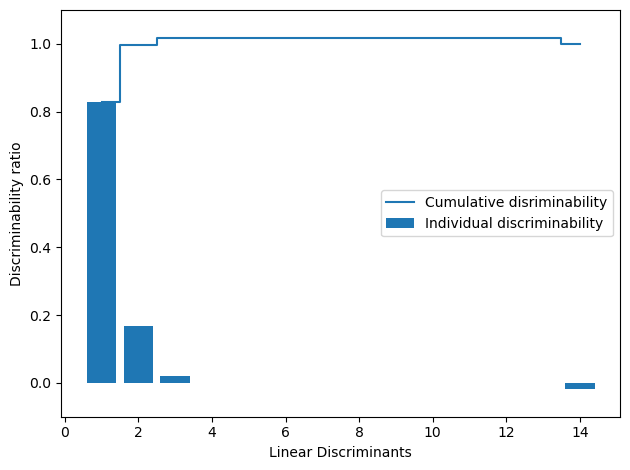

Matrix W: 
 [[-3.5835e-02  1.2317e-02]
 [ 2.5233e-01  5.4859e-01]
 [-4.9214e-02  2.4096e-02]
 [-2.5153e-02  1.4459e-04]
 [-1.3093e-02 -4.3495e-03]
 [-2.0484e-02 -9.3822e-03]
 [-1.2997e-02  2.1459e-03]
 [ 7.0886e-01 -5.3217e-01]
 [-2.2334e-01  1.6545e-01]
 [ 6.2923e-02 -6.5837e-02]
 [-4.0724e-02 -1.2608e-02]
 [ 8.5650e-02  9.8469e-02]
 [ 4.1033e-01  4.2123e-01]
 [-4.4446e-01 -4.4272e-01]]


In [214]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real,
                                   reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 15), discr, align='center',
        label='Individual discriminability')
plt.step(range(1, 15), cum_discr, where = 'mid', 
         label = 'Cumulative disriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, 
               eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W: \n', w)

Rzutowanie obiektów na nową przestrzeń cech

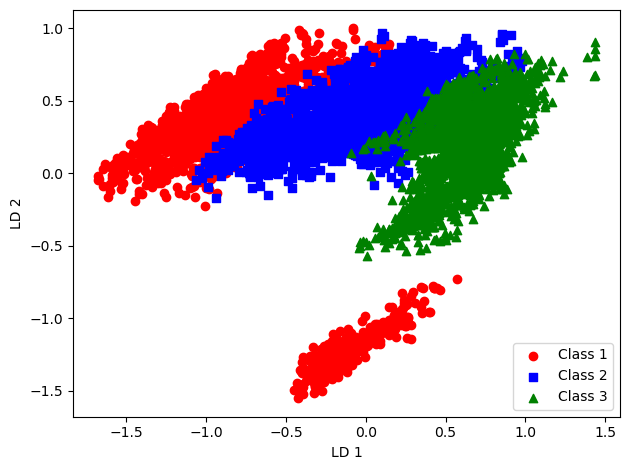

In [215]:
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['o','s','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c = c, label = f'Class {l}', marker = m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

LDA za pośrednictwem scikit-learn

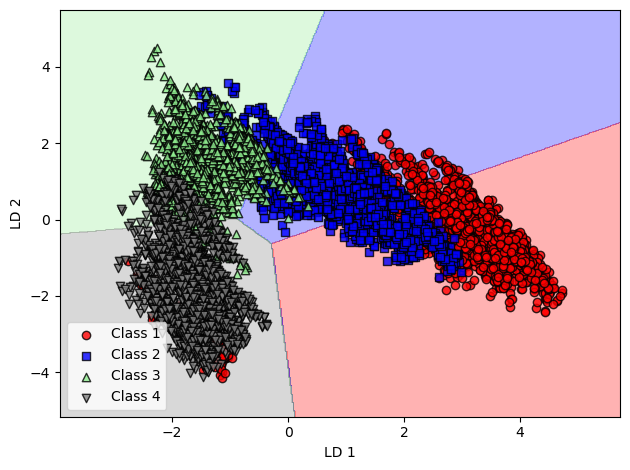

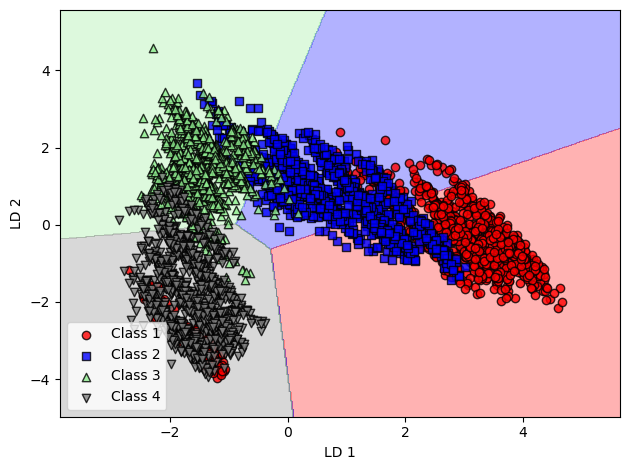

In [216]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1,
                        solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Nieliniowa redukcja wymiarowości i wizualizacja

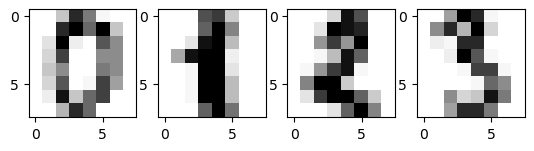

(1797, 64)


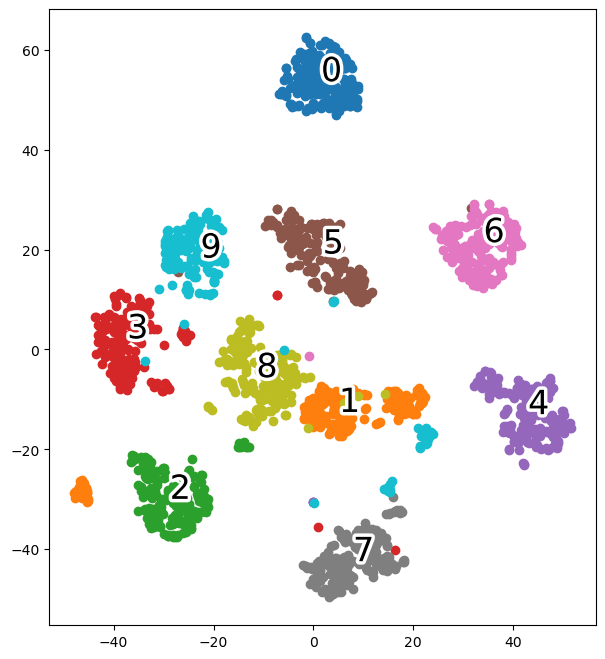

In [217]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap = 'Greys')
plt.show()
print(digits.data.shape)
y_digits = digits.target
X_digits = digits.data

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 123)
X_digits_tsne = tsne.fit_transform(X_digits)

import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):

    f = plt.figure(figsize = (8, 8))
    ax = plt.subplot(aspect = 'equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0], x[colors == i, 1])

    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize = 24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth = 5, foreground = "w"),
            PathEffects.Normal()])

plot_projection(X_digits_tsne, y_digits) 
plt.show()

# SVM

In [218]:
from sklearn.svm import SVC

X = data[['registered', 'cnt']]
Y = data['season']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y = y_combined,
                      classifier = svm,
                      test_idx = range(105, 150))
plt.xlabel('registered [standardized]')
plt.ylabel('cnt [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


ValueError: X has 2 features, but SVC is expecting 14 features as input.

# knn

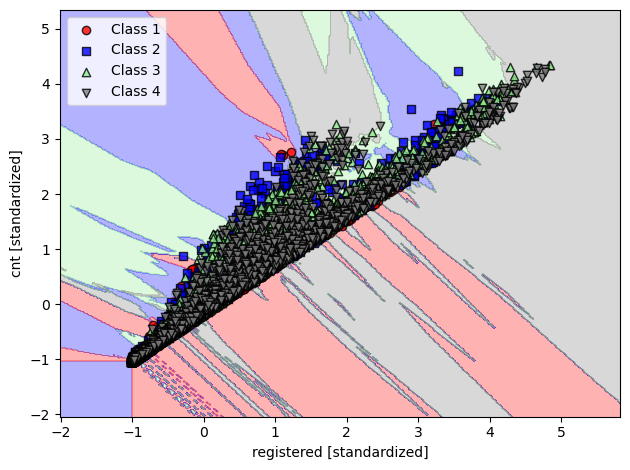

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                            metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('registered [standardized]')
plt.ylabel('cnt [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()